
# SLAP IT WITH THE SHAP

In [1]:
import os
import sys
sys.path.append(os.path.realpath(".."))
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, Conv2D, Flatten, Dropout
import ptetaphi_nn
import tools
with open("../filepath.txt", 'r') as f:
    filename = f.read().strip("\n")
    
s_table = tools.open_file(filename, sort_by="tag")

Using TensorFlow backend.
sorting data by tag


In [2]:
nt3 = s_table.nbtags==3  # 3 b tags
events = s_table[nt3]
#print(len(events))


cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# then ensure require pt >= 40 and |eta| <= 2.5
#pt_filter = events.resolved_lv.pt < 40
#events.resolved_lv.pt[pt_filter] = 0
#events.resolved_lv.eta[pt_filter] = 0
#events.resolved_lv.phi[pt_filter] = 0

#eta_filter = (events.resolved_lv.eta >= -2.5) & (events.resolved_lv.eta >= 2.5)
#events.resolved_lv.pt[eta_filter] = 0
#events.resolved_lv.eta[eta_filter] = 0
#events.resolved_lv.phi[eta_filter] = 0
#print(events.resolved_lv.pt[0])
#print(events.tag[0])
print(len(events))

313660


In [3]:
import importlib
importlib.reload(ptetaphi_nn)
importlib.reload(tools)
#nn = ptetaphi_nn.PtEtaPhiNN(events, load=("models/architecture_same_filters.json", "models/weights_same_filters.h5"), njets=10)
nn = ptetaphi_nn.PtEtaPhiNN(events, load=("../models/architecture_2b.json", "../models/weights_2b.h5"), njets=10)
nn.model.summary()

DATA FOR .csv file:
pt_mean,pt_var,eta_mean,eta_var,phi_mean,phi_var
257.98042675499437,29242.12074209279,-0.0015771052644744862,1.0690046414336554,0.005263276393500374,3.2963776239783145
166.25408179709356,15319.781927850147,-0.005313892422322825,1.154743926680384,-0.003519314033562178,3.28934504563925
77.12934317396953,2008.8786130259925,-0.0011814623151847605,1.1893891227310376,-0.0016881561497055482,3.289966913649514
160.74513956706136,21269.16375270374,-0.0033976126545411,2.4662127410640298,0.010895861920031445,3.2727168060093335
59.262299242453224,4342.003064204446,0.004766014796787041,2.733928757739942,-0.00035625071930370044,2.589335110419017
24.630997053050404,1124.3797379604657,0.005469604012108369,2.055168363194405,0.002096718362279535,1.6394836907689931
10.070897568569707,379.730915615892,0.0037123063918104607,1.1680920445082792,-0.0001879537547270546,0.8474314929245079
3.7850115517196263,132.06636040411547,0.001499154559956913,0.5297806920681057,0.0024408840686951853,0.361

100%|██████████| 62732/62732 [00:00<00:00, 71771.74it/s]
overall accuracy: 70.23 percent
ignoring 2.68762354141427 percent of 62732 events


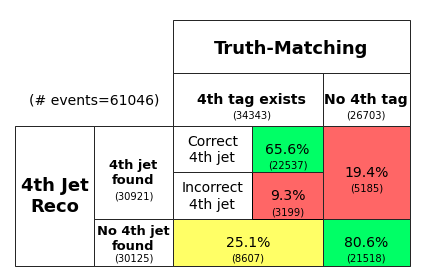

In [4]:
#import awkward
#import uproot_methods as urm
#import importlib
#importlib.reload(tools)

#one_event = awkward.Table()

#for index in range(12):
#    lv = urm.TLorentzVectorArray.from_ptetaphie(events.resolved_lv.pt[index].reshape(1, -1),
#                                                events.resolved_lv.eta[index].reshape(1, -1),
#                                                events.resolved_lv.phi[index].reshape(1, -1),
#                                                events.resolved_lv.E[index].reshape(1, -1))

#    one_event.resolved_lv = lv
#    one_event.truth = events.truth[index].reshape(1, -1)
#    one_event.tag = events.tag[index].reshape(1, -1)

#    selections = nn.evaluate(one_event, output=None)[0]
#    print(f"Event {index}")
#    print("|Tag|Truth|Sel|pt")
#    for i in range(events.njets[index]):
#        print(f"| {events.truth[index][i]} |  {events.tag[index][i]}  | {selections[i]} | {events.resolved_lv.pt[index][i]:.3f}")
#    print()
selections = nn.evaluate()

DATA FOR .csv file:
pt_mean,pt_var,eta_mean,eta_var,phi_mean,phi_var
257.98042675499437,29242.12074209279,-0.0015771052644744862,1.0690046414336554,0.005263276393500374,3.2963776239783145
166.25408179709356,15319.781927850147,-0.005313892422322825,1.154743926680384,-0.003519314033562178,3.28934504563925
77.12934317396953,2008.8786130259925,-0.0011814623151847605,1.1893891227310376,-0.0016881561497055482,3.289966913649514
160.74513956706136,21269.16375270374,-0.0033976126545411,2.4662127410640298,0.010895861920031445,3.2727168060093335
59.262299242453224,4342.003064204446,0.004766014796787041,2.733928757739942,-0.00035625071930370044,2.589335110419017
24.630997053050404,1124.3797379604657,0.005469604012108369,2.055168363194405,0.002096718362279535,1.6394836907689931
10.070897568569707,379.730915615892,0.0037123063918104607,1.1680920445082792,-0.0001879537547270546,0.8474314929245079
3.7850115517196263,132.06636040411547,0.001499154559956913,0.5297806920681057,0.0024408840686951853,0.361

getting nn scores
working on jet 0


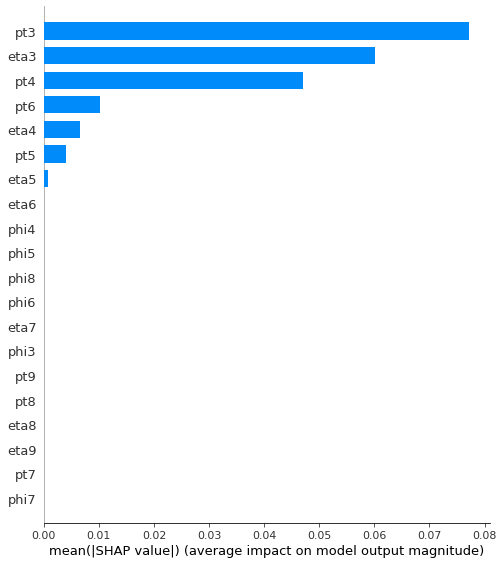

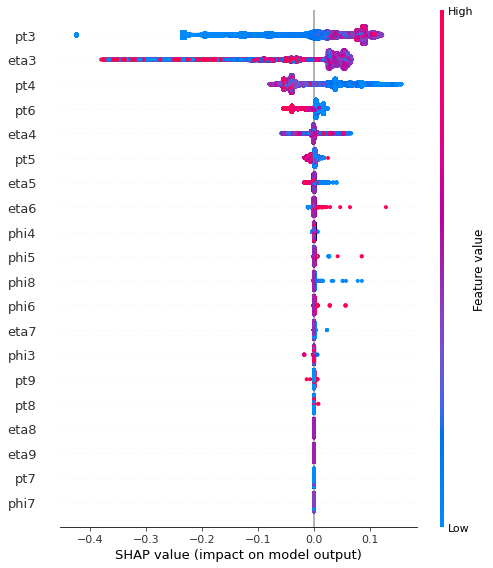

<Figure size 432x288 with 0 Axes>

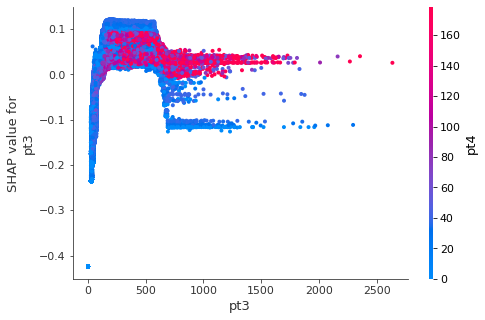

working on jet 1


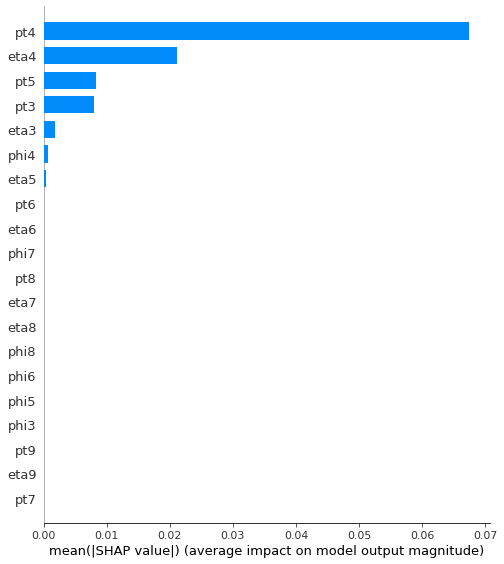

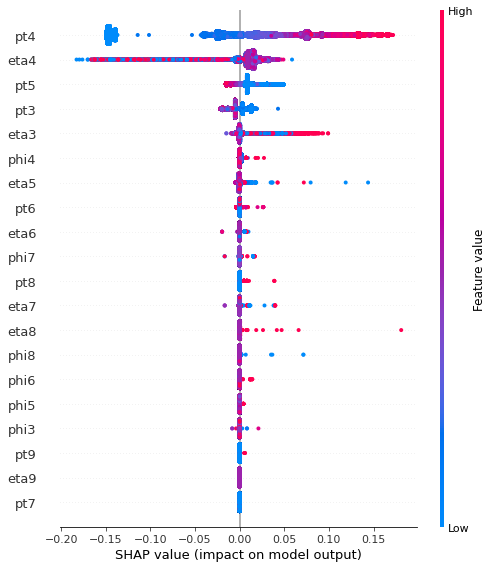

<Figure size 432x288 with 0 Axes>

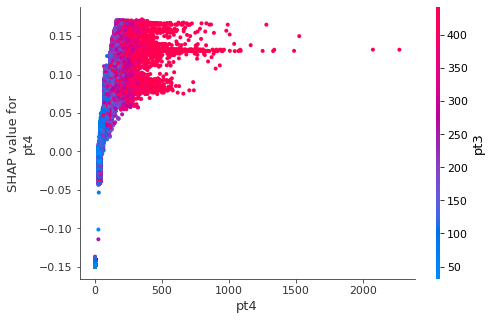

working on jet 2


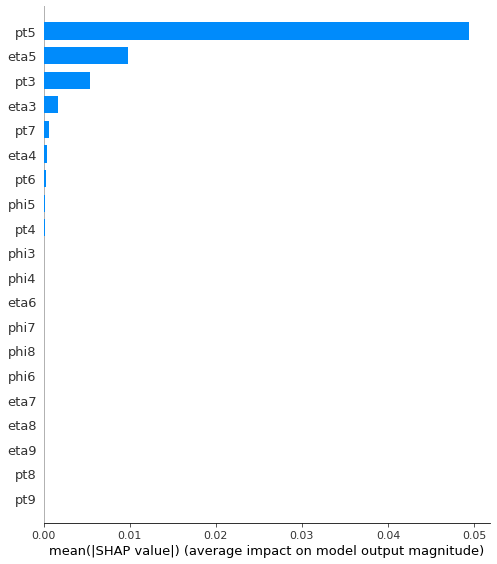

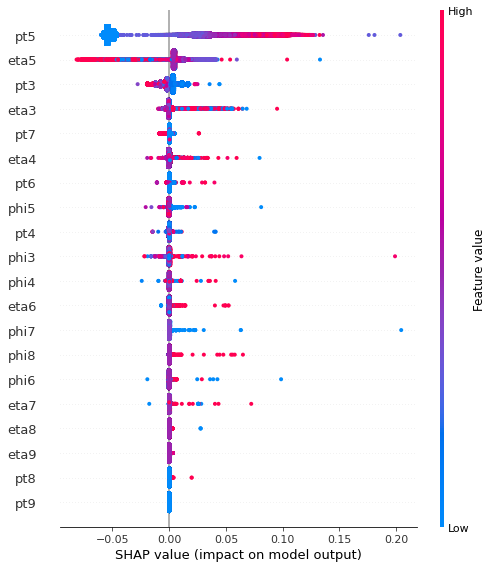

<Figure size 432x288 with 0 Axes>

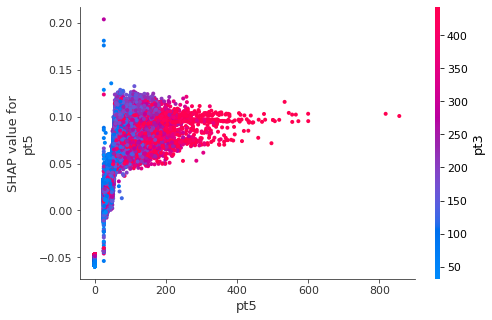

working on jet 3


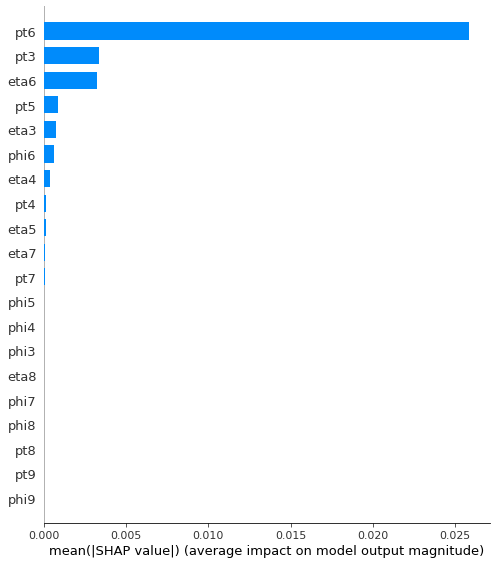

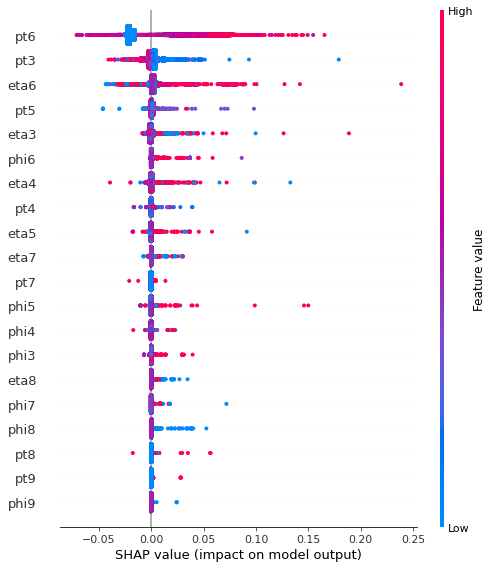

<Figure size 432x288 with 0 Axes>

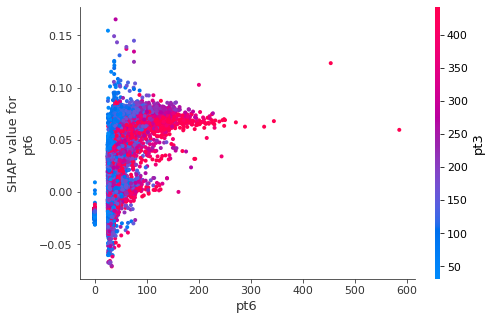

working on jet 4


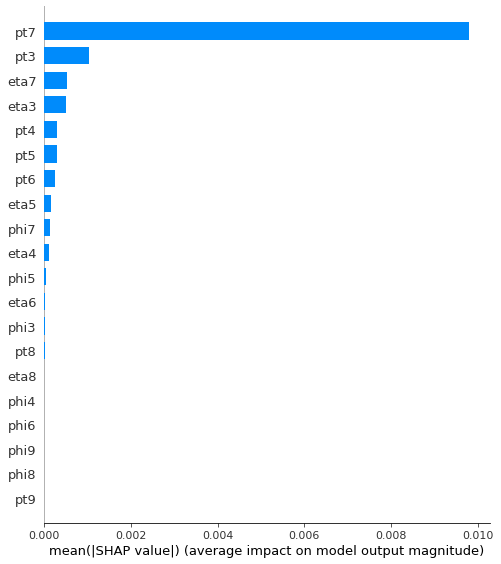

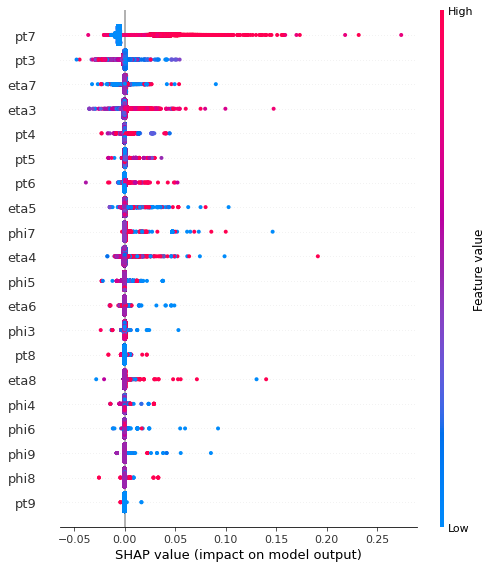

<Figure size 432x288 with 0 Axes>

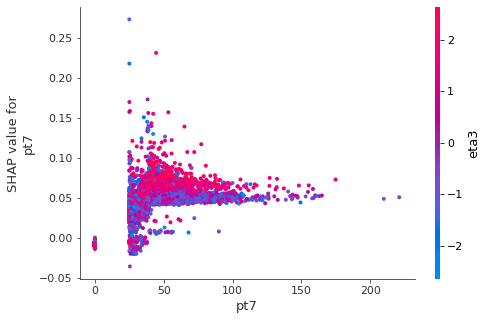

working on jet 5


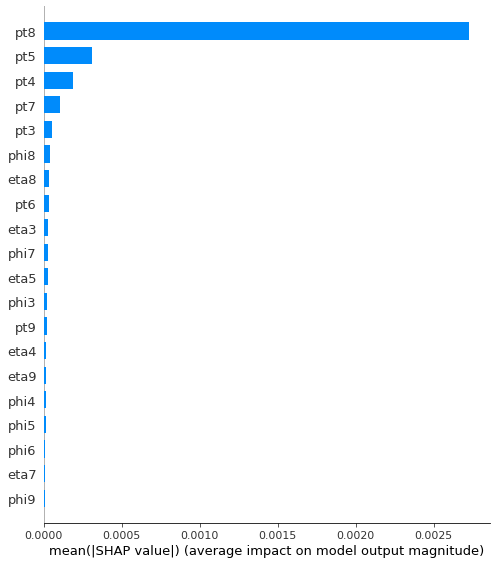

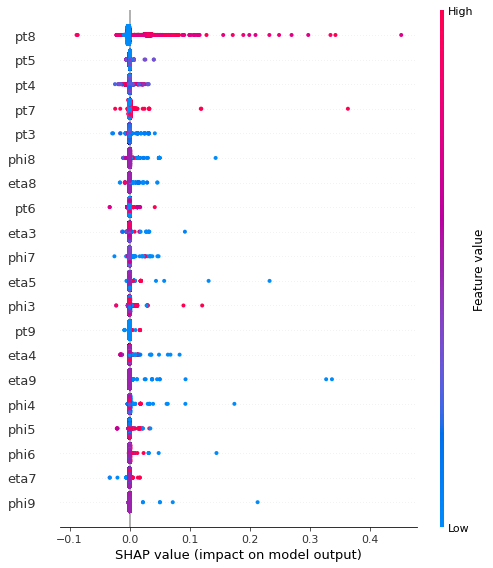

<Figure size 432x288 with 0 Axes>

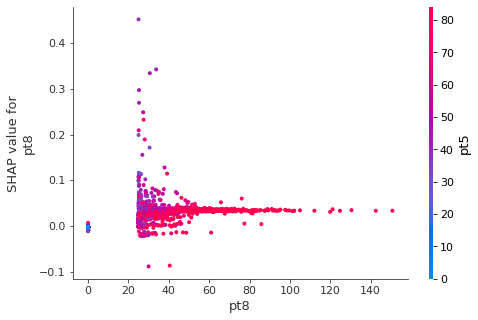

working on jet 6


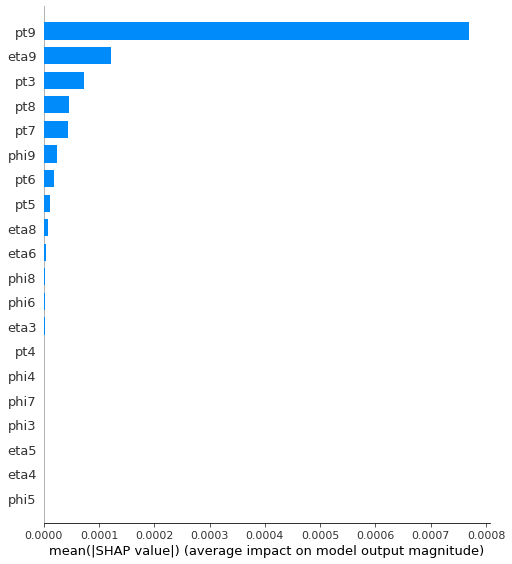

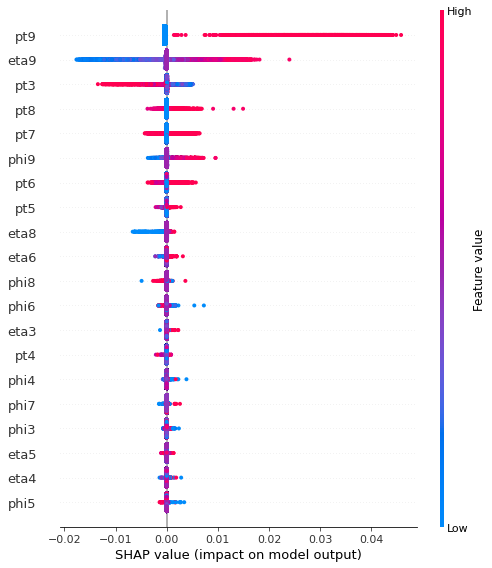

<Figure size 432x288 with 0 Axes>

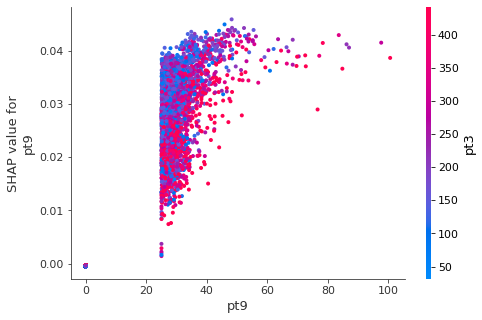

working on jet 7


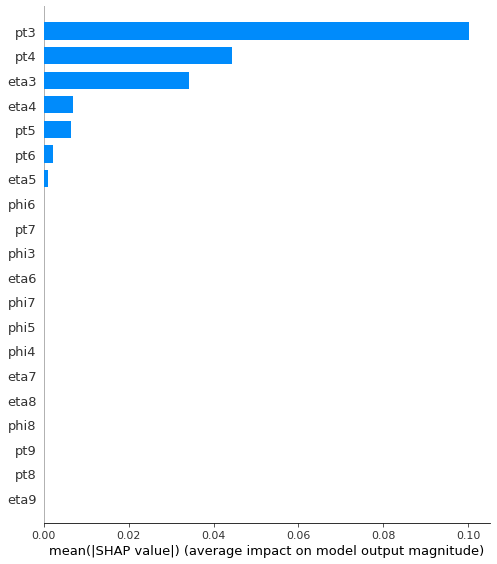

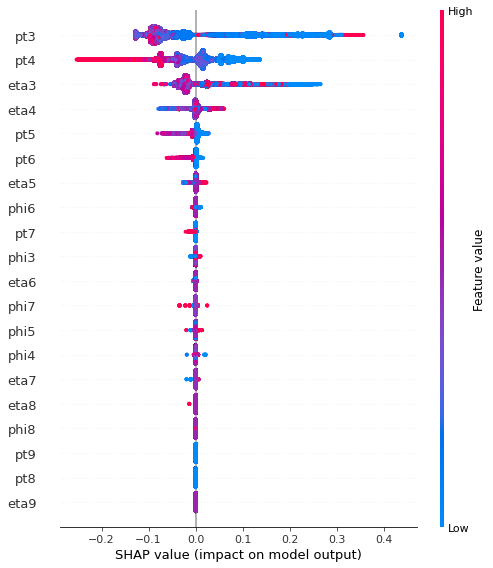

ValueError: Could not find feature named: pt10

In [6]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### THE REAL SHAP BEGINS HERE ######

# Creating pandas dataframe from numpy arrays
X = pd.DataFrame({
    #'pt0': events.resolved_lv.pt[:,0],
    #'pt1': events.resolved_lv.pt[:,1],
    #'pt2': events.resolved_lv.pt[:,2],
    'pt3': events.resolved_lv.pt[:,3],
    'pt4': events.resolved_lv.pt[:,4],
    'pt5': events.resolved_lv.pt[:,5],
    'pt6': events.resolved_lv.pt[:,6],
    'pt7': events.resolved_lv.pt[:,7],
    'pt8': events.resolved_lv.pt[:,8],
    'pt9': events.resolved_lv.pt[:,9],
    #'eta0': events.resolved_lv.eta[:,0],
    #'eta1': events.resolved_lv.eta[:,1],
    #'eta2': events.resolved_lv.eta[:,2],
    'eta3': events.resolved_lv.eta[:,3],
    'eta4': events.resolved_lv.eta[:,4],
    'eta5': events.resolved_lv.eta[:,5],
    'eta6': events.resolved_lv.eta[:,6],
    'eta7': events.resolved_lv.eta[:,7],
    'eta8': events.resolved_lv.eta[:,8],
    'eta9': events.resolved_lv.eta[:,9],
    #'phi0': events.resolved_lv.phi[:,0],
    #'phi1': events.resolved_lv.phi[:,1],
    #'phi2': events.resolved_lv.phi[:,2],
    'phi3': events.resolved_lv.phi[:,3],
    'phi4': events.resolved_lv.phi[:,4],
    'phi5': events.resolved_lv.phi[:,5],
    'phi6': events.resolved_lv.phi[:,6],
    'phi7': events.resolved_lv.phi[:,7],
    'phi8': events.resolved_lv.phi[:,8],
    'phi9': events.resolved_lv.phi[:,9],
    })

print("getting nn scores")
nn_score = nn.evaluate(events, output="nn_score")

for n in range(8):
    print("working on jet", n)
    # n-th jet
    Y = pd.DataFrame({'output': nn_score[:,n]})

    # Split the data into train and test data:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    # Build the model with the random forest regression algorithm:
    model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
    model.fit(X_train, Y_train)

    f = plt.figure()
    shap_values = shap.TreeExplainer(model).shap_values(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    f.savefig(f"plot_bar_{n}.png", bbox_inches='tight')

    f = plt.figure()
    shap.summary_plot(shap_values, X_train)
    f.savefig(f"plot_violin_{n}.png", bbox_inches='tight')

    f = plt.figure()
    shap.dependence_plot(f"pt{n+3}", shap_values, X_train)
    f.savefig(f"plot_dependence_{n}.png", bbox_inches='tight')


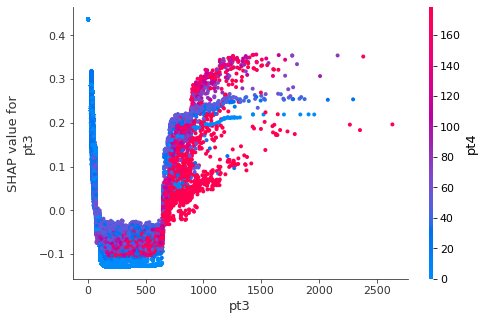

In [9]:
shap.dependence_plot("pt3", shap_values, X_train)
